# Life Expectancy(WHO) dataset

## The data-set aims to answer the following key questions:
immunization and HDI (Human Development Index) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on life Expectancy?

__In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well.__<br>
__The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.__

## Main questions to direct in this research project

1. What is the impact of schooling on the lifespan of humans in developed and developing countries?

2. What is the impact of economical factor on life Expectancy?

3. What is the impact of Immunization coverage on life Expectancy?

## Data preparation

In [286]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

There are 2 tables:
1. data - dataset on life expectancy and various factors affecting it. It includes the data for 193 countries from year 2000-2015
2. continents - dataset of life expectancy that includes the continents of the countries

In [151]:
life_expectancy = pd.read_csv('data/life-expectancy.csv')
continents_lexp = pd.read_csv('data/life-expectancy-with-continents.csv', encoding = "ISO-8859-1")

In [154]:
data = life_expectancy.merge(continents_lexp, how='inner', on='Country')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Rank,Overall Life,Male Life,Female Life,Continent
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,33736494.0,17.2,17.3,0.479,10.1,221,51.3,49.9,52.7,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,327582.0,17.5,17.5,0.476,10.0,221,51.3,49.9,52.7,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,31731688.0,17.7,17.7,0.470,9.9,221,51.3,49.9,52.7,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,3696958.0,17.9,18.0,0.463,9.8,221,51.3,49.9,52.7,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,2978599.0,18.2,18.2,0.454,9.5,221,51.3,49.9,52.7,Asia


### Data preprocessing

Even though the dataset was collected from Global Health Observatory(GHO) repository, there are still missing values and inconsistencies that we can notice

In [155]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Rank,Overall Life,Male Life,Female Life
count,2521.000000,2512.000000,2512.000000,2521.000000,2368.000000,2521.000000,2038.000000,2521.000000,2503.000000,2521.000000,...,2363.000000,2.158000e+03,2503.000000,2503.000000,2467.000000,2471.000000,2521.000000,2521.000000,2521.000000,2521.000000
mean,2007.519635,69.046736,166.615446,31.248314,4.509358,822.312480,81.101570,2255.073780,38.306552,43.784609,...,7464.141232,1.258592e+07,4.871274,4.915062,0.630754,12.104775,123.013090,71.028758,68.638913,73.489211
std,4.614129,9.749820,127.011736,124.822144,4.008665,2100.619592,24.756308,10838.302753,19.906834,170.439772,...,14366.179785,6.226940e+07,4.495456,4.580071,0.210380,3.323945,63.433225,8.851238,8.392786,9.443424
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,...,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,1.000000,50.200000,48.600000,51.000000
25%,2004.000000,62.700000,73.000000,0.000000,0.790000,15.881493,77.000000,0.000000,19.200000,0.000000,...,461.936686,2.146920e+05,1.600000,1.600000,0.490500,10.200000,74.000000,64.500000,62.400000,67.100000
50%,2008.000000,72.000000,144.000000,3.000000,3.730000,95.193759,92.000000,15.000000,43.400000,3.000000,...,1787.947230,1.386542e+06,3.400000,3.400000,0.683000,12.400000,125.000000,73.800000,71.200000,77.100000
75%,2012.000000,75.700000,229.000000,22.000000,7.520000,513.346541,97.000000,343.000000,55.900000,28.000000,...,5842.134530,7.387614e+06,7.200000,7.200000,0.782000,14.400000,180.000000,77.200000,74.600000,80.500000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,223.000000,89.500000,85.600000,93.500000


### Detecting missing and inconsistent values
There are few things that might seem odd at first glance: 
- Infant deaths being 0 per 1000 population
- Adult mortality rate being very low
- Schooling being 0.
- and more

Some of the values in the dataset could just be a deviation, but there is a possiblity that some of them are errors. Therefore, I decided to convert to null as numbers do not make sense for the following:
- adult mortality if lower than 5th percentile.
- infant death being 0 per 1000
- schooling being 0 per 1000

_This dataset has more such inconsistencies in the data but I will focus only the above mentioned as others do not affect the result significantly._

In [156]:
information_vars = data.iloc[:, 0:3] # first 3 cols
predicting_vars  = data.iloc[:, 3:]  # from 3 to last cols

# adult mortality
fifth_percentile = np.percentile(data.iloc[:, 4].dropna(), 5)
data.iloc[:, 4] = data.apply(lambda r: np.nan if r["Adult Mortality"] < fifth_percentile else r["Adult Mortality"], axis=1)
# infant deaths
data['infant deaths'] = data['infant deaths'].replace(0, np.nan)
# schooling
data['Schooling'] = data['Schooling'].replace(0, np.nan)

### Dealing with Missing Values
One of the ways to deal with missing values is to use __interpolation__

In [161]:
interpolated_years = []

for year in list(data.Year.unique()):
    # get data from that particular year
    year_data = data[data.Year == year].copy() 
    # iterate over the predicting variables
    for col in list(year_data.columns)[3:]:
        # interpolate the data for a given predicting variable in that year
        year_data[col] = year_data[col].interpolate(method ='linear', limit_direction ='forward')
    interpolated_years.append(year_data)

# reassamble updated data
data = pd.concat(interpolated_years).copy()

## Basic Exploration

#### The changes of life expectancy over the course of 15 years

In [482]:
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=data.groupby('Year').mean(), x='Year', y='Life Expectancy ')
plt.title('Median Life expectancy in the world')

ValueError: Could not interpret value `Life Expectancy ` for parameter `y`

<Figure size 720x432 with 0 Axes>

#### Distribution of Life Expectancy

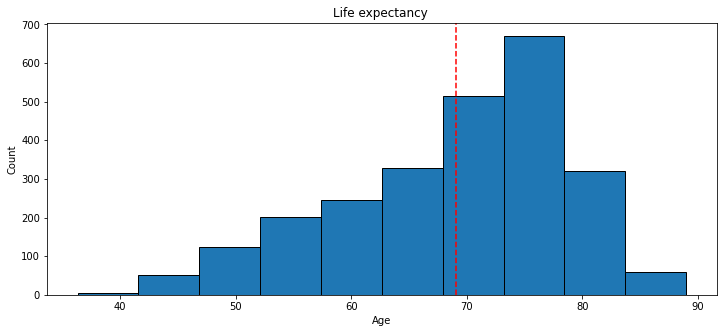

In [210]:
col = 'Life expectancy '

plt.figure(figsize=(12, 5))
plt.hist(data[col], ec='black')
plt.title(col)
plt.xlabel('Age')
plt.ylabel('Count')

mean = data[col].mean()
mean

plt.axvline(mean, color='r', linestyle='--')

The bar historgram displays that the majority of lifespan lies between 45 to 90 years with an average lifespan of 69 in the world. There has been a huge development in health sector resulting in improvement of human mortality in comparison to the past 30 years.

__For better visualization, let's compare the life expectancy in different continents__

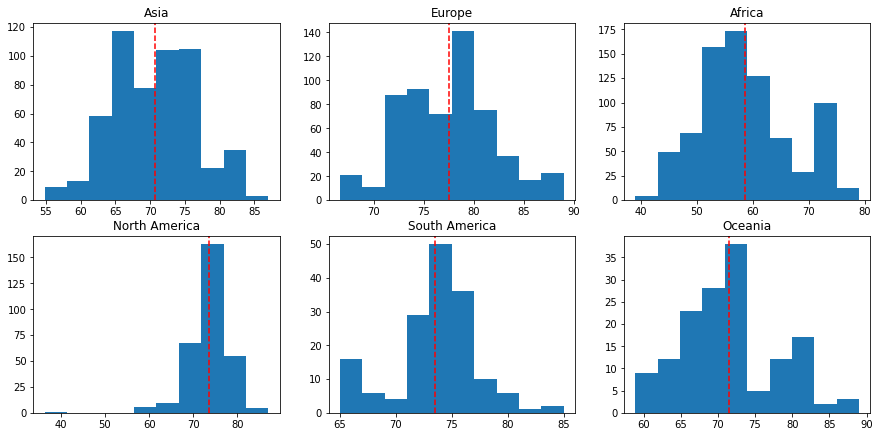

In [238]:
plt.figure(figsize=(15,15))
for i, continent in enumerate(data['Continent'].unique(), 1):
    cont_countries = data[data.Continent == continent]
    cont_lifespan = cont_countries[col]

    plt.subplot(4,3,i)
    plt.hist(cont_lifespan)
    plt.title(continent)
    
    plt.axvline(cont_lifespan.mean(), color='r', linestyle='--')

According to the plots, we can observe that lifespan in different continents various but some of them have a significant distinction. For example, average lifespan in Europe(77) and Africa(58). 

Does it mean that the countries in Europe are on the top of the list in average life expectancy?

Text(0, 0.5, 'Average lifespan')

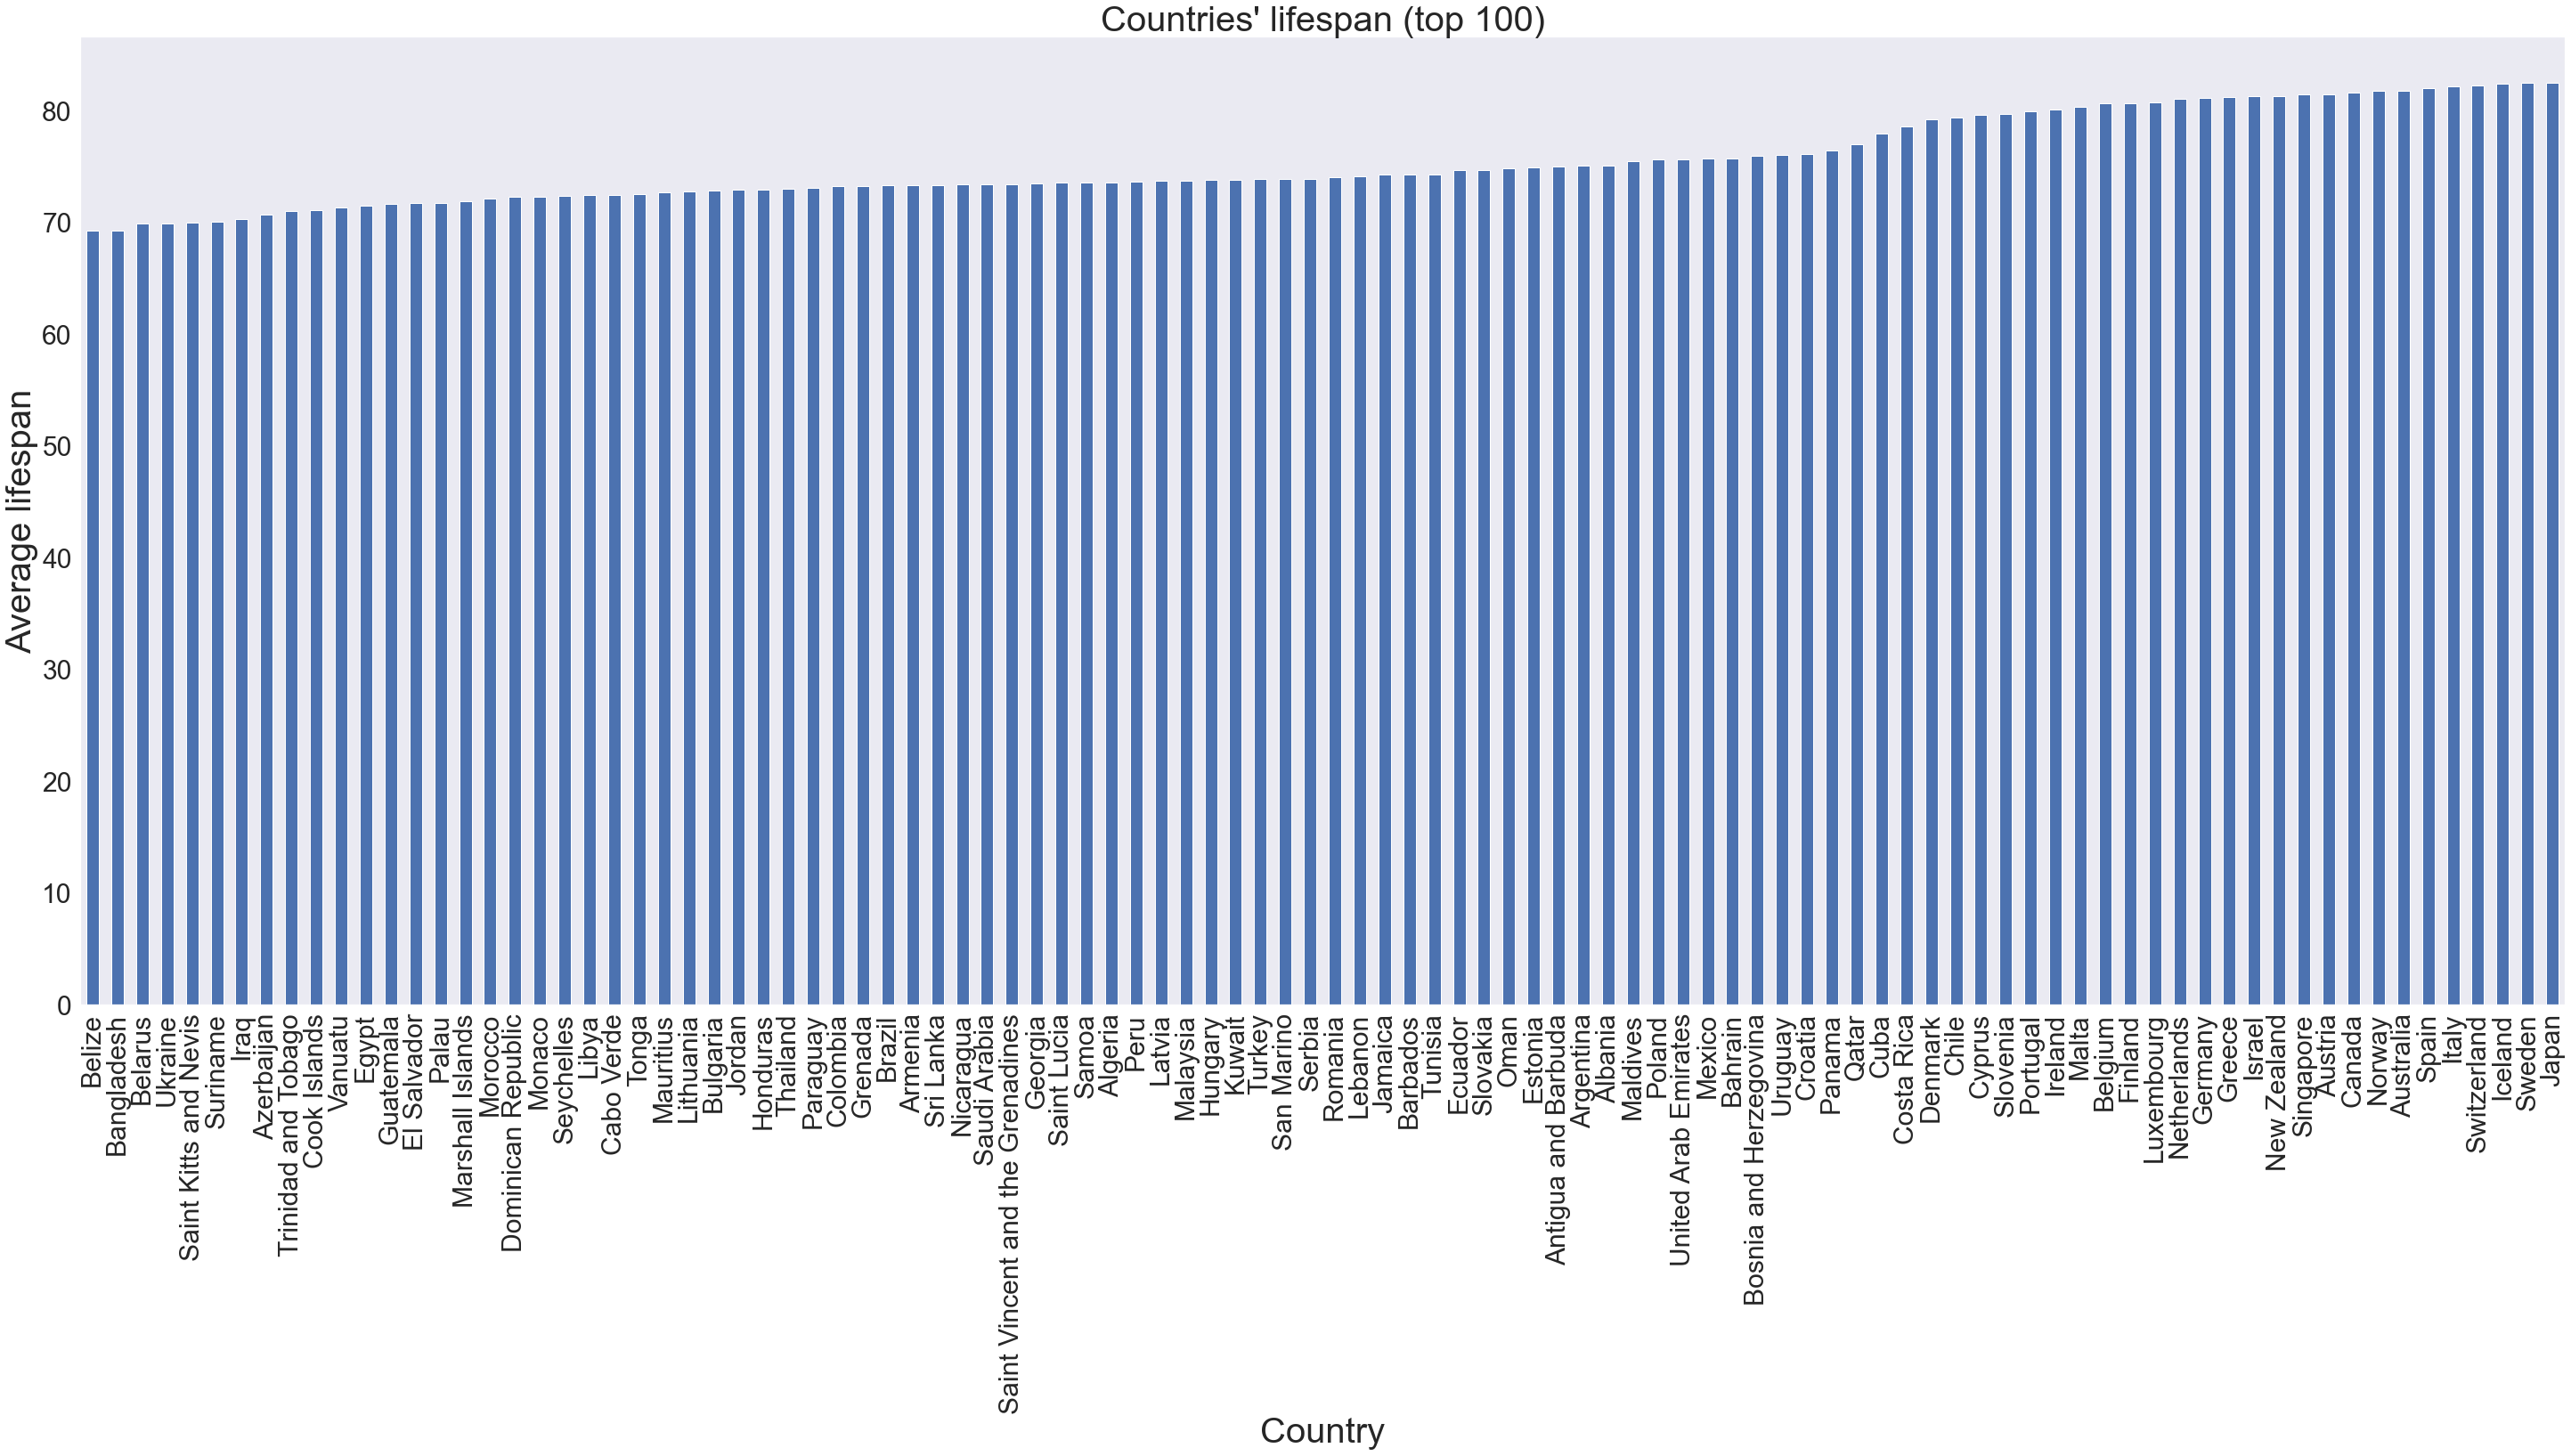

In [343]:
# get top 100 countries with hightest lifespan
countries_lifespan = data.groupby('Country')[col].mean()
sorted_countries_lifespan = countries_lifespan.sort_values(ascending=True)
top_countries_lifespan = sorted_countries_lifespan[-100:]

top_countries_lifespan.plot(kind='bar', figsize=(50,20), fontsize=30)
plt.title(f"Countries' lifespan (top 100)", fontsize=40)
plt.xlabel("Country", fontsize=40)
plt.ylabel("Average lifespan", fontsize=40)

We can observe that not all the countries in the top of the list are from Europe. Japan is the country with the highest life expectancy.

What? why?

## What is the impact of schooling on the lifespan of humans in developed and developing countries?


_By predicting factors, we are going to consider immunization, mortality and economic factors_

**Before comparing the countries based on their status, let's examine if schooling factor indeed affect the lifespan and if it does how much?**

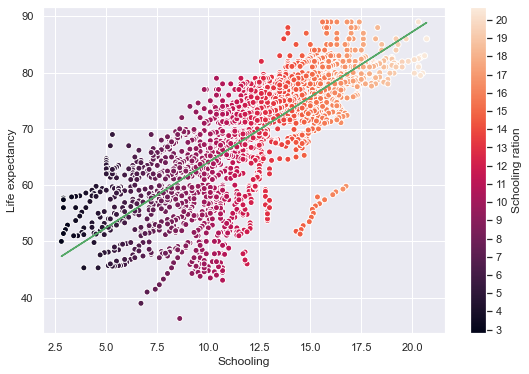

In [324]:
# display the data on the scatter plot
plt.scatter(data.Schooling, data[col], c=data.Schooling, edgecolors='white')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')
plt.rcParams['axes.grid'] = False
cbar=plt.colorbar(ticks=range(1, 22))
cbar.set_label('Schooling ration', rotation=90)

#display the regression line
m, b = np.polyfit(data.Schooling, data[col], 1)

plt.plot(data.Schooling, m*data.Schooling + b, c='g')

The figure above represents that schooling and life expectancy has a positive correlation: higher the average number of years of schooling a person receives the longer lifespan they expected to have.

Now, let's see how much impact schooling variable has in developing versus developed countries. Is it the same? 

Text(0.5, 0, 'Schooling')

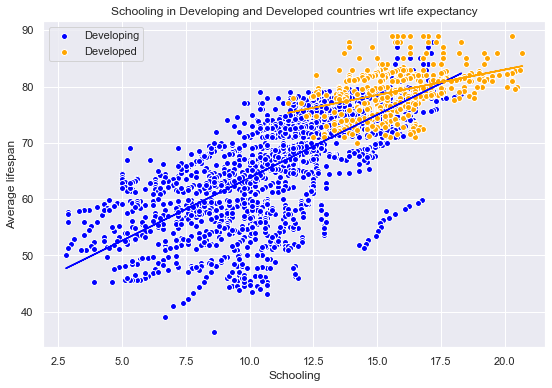

In [384]:
fig = plt.figure()
ax = fig.add_subplot()

developing = data[data.Status == "Developing"]
developed  = data[data.Status == "Developed"]

#display scatter points of each status
ax.scatter(developing.Schooling, developing[col], c='blue', edgecolors='white', label='Developing')
ax.scatter(developed.Schooling, developed[col], c='orange', edgecolors='white', label='Developed')
plt.legend(loc='upper left')

#display regression line for each status
m1, b1 = np.polyfit(developing.Schooling, developing[col], 1)
m2, b2 = np.polyfit(developed.Schooling, developed[col], 1)

plt.plot(developing.Schooling, m1*developing.Schooling + b1, c='blue')
plt.plot(developed.Schooling, m2*developed.Schooling + b2, c='orange')

plt.title('Schooling in Developing and Developed countries wrt life expectancy')
plt.ylabel('Average lifespan')
plt.xlabel('Schooling')

We can observe that the blue slope is steeper than the orange one. This implies that schooling developing countris has more impact on life expectancy than in developed countries. 

## What is the impact of economical factor on life Expectancy?

1. GDP
2. percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
3. total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

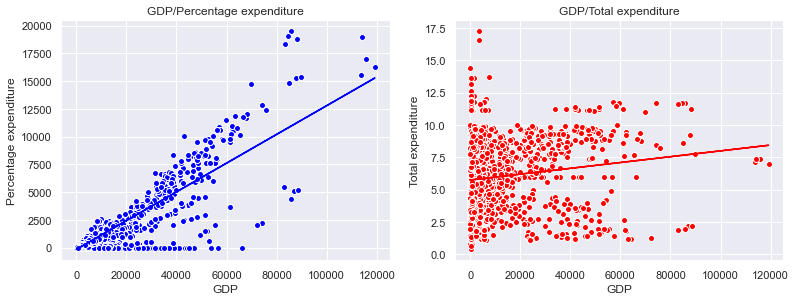

In [401]:
p_exp = 'percentage expenditure'
t_exp = 'Total expenditure'

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.scatter(data.GDP, data[p_exp], c='blue', edgecolors='white')
plt.title('GDP/Percentage expenditure')
plt.ylabel('Percentage expenditure')
plt.xlabel('GDP')

m1, b1 = np.polyfit(data.GDP, data[p_exp], 1)
plt.plot(data.GDP, m1*data.GDP + b1, c='blue')

plt.subplot(3,3,2)
plt.scatter(data.GDP, data[t_exp], c='red', edgecolors='white')
plt.title('GDP/Total expenditure')
plt.ylabel('Total expenditure')
plt.xlabel('GDP')

m2, b2 = np.polyfit(data.GDP, data[t_exp], 1)
plt.plot(data.GDP, m2*data.GDP + b2, c='red')

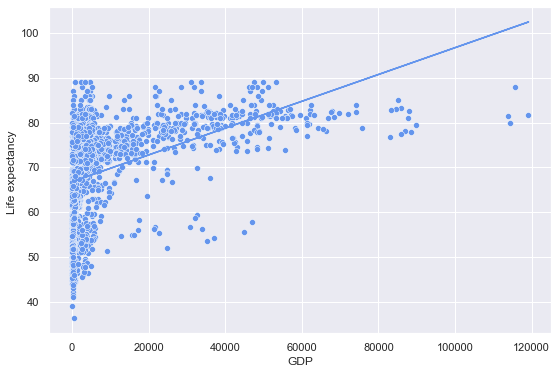

In [413]:
# sns.regplot(x=data.GDP, y=data[col], color='cornflowerblue').set_title('GDP/Life expectancy')
sns.scatterplot(x=data.GDP, y=data[col], color='cornflowerblue')

m, b = np.polyfit(data.GDP, data[col], 1)

plt.plot(data.GDP, m*data.GDP + b, c='cornflowerblue')

The impact of economical factors on life expectancy is quite significant. We considered percentage and total expenditure, and GDP under economic variable. According to the graphs above, we can see that GDP has a influence on percentage and total expenditure. This implies that if a country has a high GDP then people residing in this country have a good health care system as expenditure on health depends on GDP. Therefore, we can say that GDP has positive correlation with Life expectancy according to the data. In the figure above, we can see the steep slope indicating that countries with high GDP have longer lifespan

## What is the life expectancy of male and female in developing and developed countries

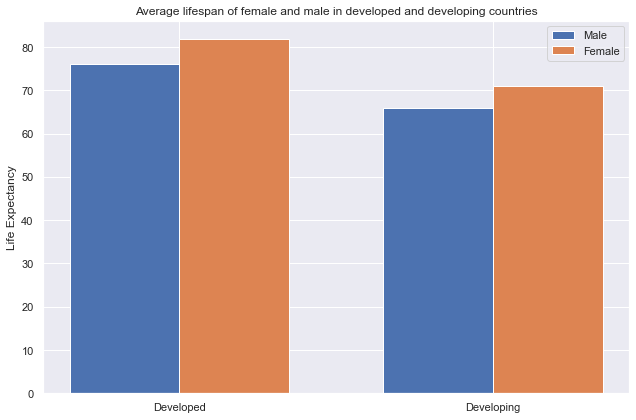

In [479]:
status = ['Developed', 'Developing']
male_mean = data.groupby(['Status'])['Male Life'].mean().values.astype(int)
female_mean = data.groupby(['Status'])['Female Life'].mean().values.astype(int)

x = np.arange(len(status))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_mean, width, label='Male')
rects2 = ax.bar(x + width/2, female_mean, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Life Expectancy')
ax.set_title('Average lifespan of female and male in developed and developing countries')
ax.set_xticks(x)
ax.set_xticklabels(status)
ax.legend()

fig.tight_layout()

plt.show()

We can see that the women live longer than men based on the figure. Additionally, we can say that no matter the status of the country(developed/developing), the lifespan of women is still longer than men.(but shorter than in developed countries)

## What is the impact of Immunization coverage on life Expectancy?

In [363]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Rank', 'Overall Life',
       'Male Life', 'Female Life', 'Continent'],
      dtype='object')

In [366]:

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Rank,Overall Life,Male Life,Female Life,Continent
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.010,71.279624,65.0,1154,...,33736494.0,17.2,17.3,0.479,10.1,221,51.3,49.9,52.7,Asia
16,Albania,2015,Developing,77.8,74.0,41.5,4.600,364.975229,99.0,0,...,28873.0,1.2,1.3,0.762,14.2,59,78.3,75.7,81.2,Europe
32,Algeria,2015,Developing,75.6,19.0,21.0,4.641,0.000000,95.0,63,...,39871528.0,6.0,5.8,0.743,14.4,79,76.8,75.5,78.2,Africa
48,Angola,2015,Developing,52.4,335.0,66.0,4.682,0.000000,64.0,118,...,2785935.0,8.3,8.2,0.531,11.4,207,56.0,54.8,57.2,Africa
64,Antigua and Barbuda,2015,Developing,76.4,13.0,37.0,4.723,0.000000,99.0,0,...,23101850.0,3.3,3.3,0.784,13.9,85,76.5,74.4,78.8,North America


In [327]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Rank', 'Overall Life',
       'Male Life', 'Female Life', 'Continent'],
      dtype='object')

In [16]:
x = data.GDP.values.reshape(-1,1)
y = data['percentage expenditure'].values.reshape(-1,1)
y

array([[71.27962362],
       [73.52358168],
       [73.21924272],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

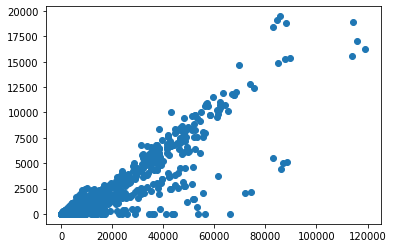

In [20]:
np.arange(min(data.GDP), max(data.GDP)).reshape(-1,1)
plt.scatter(x,y)